<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.width", 1000)

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
print(shopping_data.head())

   SessionID  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  Weekend Month        CustomerType  Purchase
0          1               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0    False   Feb  Returning_Customer       0.0
1          2               0                      0.0              0                     0.0               2                64.000000         0.00       0.10         0.0         0.0    False   Feb  Returning_Customer       0.0
2          3               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0    False   Feb  Returning_Customer       0.0
3          4               0                      0.0              0                     0.0

The marketing team asked you to analyze the behavior of online customers during November and December, the busiest months for shoppers.

What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called `purchase_rates` in the format below using the exact names for keys.
`purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}`

In [2]:
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]
print(shopping_Nov_Dec.head())

      SessionID  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  Weekend Month        CustomerType  Purchase
5463       5464               1                     39.2              2                   120.8               7                80.500000     0.000000   0.010000    0.000000         0.0     True   Nov        New_Customer       0.0
5464       5465               3                     89.6              0                     0.0              57              1721.906667     0.000000   0.005932  204.007949         0.0     True   Nov  Returning_Customer       1.0
5467       5468               4                    204.2              0                     0.0              31               652.376667     0.012121   0.016162    0.000000         0.0    False   Nov  Returning_Customer       0.0
5479       5480               0                      0.0              0         

In [3]:
print(shopping_Nov_Dec['Month'].unique())

['Nov' 'Dec']


In [4]:
count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64


In [5]:
# Total number of session by CustomerType
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])

# Total number of purchase by CustomerType
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]

# Calculate purchase rates
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

# Therefore, the online purchase for the returning customers is lower than that of the new customers.
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called `top_correlation` in the format below using the exact names for keys.
`top_correlation = {"pair": (x_duration, y_duration), "correlation": 0.345}`

In [6]:
cor_admin_info = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])
cor_admin_product = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['ProductRelated_Duration'])
cor_product_info = shopping_Nov_Dec['ProductRelated_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])

print(cor_admin_info)
print(cor_admin_product)
print(cor_product_info)

top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

0.24468855792839223
0.3898546003206961
0.36712552534442083
{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206961}


A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called `prob_at_least_100_sales`. Optional: plot a binomial probability distribution chart to visualize your chances.

In [7]:
print("Current purchase rate for the returning customer:", purchase_rate_returning)

Current purchase rate for the returning customer: 0.1955937667920473


In [8]:
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased purchase rate for the returning customer:", increased_purchase_rate_returning)

Increased purchase rate for the returning customer: 0.22493283181085436


In [9]:
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchase_rate_returning)
print("probability of having <100 sales:", prob_sales_100_less)

probability of having <100 sales: 0.0987778660962742


In [10]:
prob_at_least_100_sales = 1 - prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037259


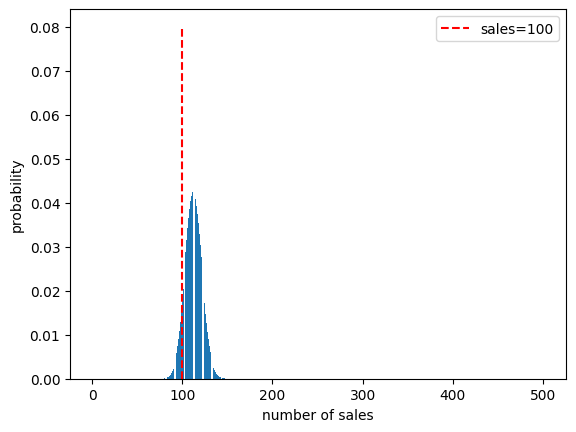

In [11]:
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()